**<span style="color:green">**Метаданные (наименование поля - краткое описание - тип):**</span>**  
* <span style="color:green">#:</span> порядковый номер - int64
* <span style="color:green">Name:</span> имя покемона - object
* <span style="color:green">Type 1:</span> тип покемона - object
* <span style="color:green">Type 2:</span> второй тип для покемонов двойного типа, или n/a для покемонов одинарного типа- object
* <span style="color:green">Total:</span> сумма всех характеристик - int64
* <span style="color:green">HP:</span> здоровье - int64
* <span style="color:green">Attack:</span> сила атаки - int64
* <span style="color:green">Defense:</span> сила защиты - int64
* <span style="color:green">SP Atk:</span> сила специальной атаки - int64
* <span style="color:green">SP Def:</span> сила специальной защиты - int64
* <span style="color:green">Speed:</span> скорость- int64
* <span style="color:green">Generation:</span> поколение - int64
* <span style="color:green">Legendary:</span> легендарный или обычный (true, если легендарный) - bool


**<span style="color: blue;">Необходимо проанализировать данные и ответить на вопросы:</span>**

<span style="color:blue">1.</span>  Сколько % покемонов имеет двойной тип?  
<span style="color:blue">2.</span> Сколько всего типов покемонов и какими они бывают?  
<span style="color:blue">3.</span> У кого лучше общие показатели (Total): у покемонов двойного или одинарного типа?  
<span style="color:blue">4.</span> У кого лучше средний показатель Защита (Defense): у покемонов типа Grass или у покемонов типа Fairy? (покемоны двойного типа учитываются)  
<span style="color:blue">5.</span> Мы полагаем, что среднестатистический легендарный покемон должен быть сильнее, чем среднестатистический нелегендарный. Подтвердите или опровергните это предположение.  
<span style="color:blue">6.</span> Покажите все случаи (пары покемонов), когда легендарный покемон по показателю Total оказался слабее, чем нелегендарный. Сколько таких случаев?  
<span style="color:blue">7.</span> Для каждой пары, в которой нелегендарный покемон оказывается сильнее легендарного посчитайте разницу в показателе Total. Постройте гистограму полученной величины. Похоже ли распределение на нормальное? Рассчитайте среднее арифметическое, медиану и моду данной величины.  
<span style="color:blue">8.</span> Назовите две характеристики покемонов, которые коррелируют в наименьшей степени.  
<span style="color:blue">9.</span> Что делает покемона легендарным, кроме суммы характеристик? Важнее сила атаки или сила защиты, а может сила специальной атаки или сила специальной защиты, или скорость, или здоровье? А может важна уникальность типа или поколение покемона? Подкрепите свое мнение расчетами.  

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
file_path = '/home/sergey/Desktop/Analytics/Pokemon.csv'

In [132]:
df = pd.read_csv(file_path, index_col= 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 82.0+ KB


In [133]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# 1. Сколько % покемонов имеет двойной тип?

In [134]:
dual = df['Type 2'].count()
total = len(df)
print(f'{round((dual/total) * 100, 2)}% покемонов имеет двойной тип.')

51.75% покемонов имеет двойной тип.


# 2. Сколько всего типов покемонов и какими они бывают?

In [135]:
df[['Type 1', 'Type 2']].nunique()

Type 1    18
Type 2    18
dtype: int64

Получаем из таблицы подсчёт уникальных типов в столбцах Type 1 и Type 2, но важно учесть возможные особые случаи, когда в одном столбце могут быть типы, которые не фигурируют в другом.

In [136]:
Pokemon_type = (df.groupby('Type 2')['Type 2'].count()) + (df.groupby('Type 1')['Type 1'].count())
#Получили в совокупности подсчёт всех типов покемонов, значащихся в обоих столбцах
print(f'Всего {len(Pokemon_type.index)} типов покемонов: {", ".join(Pokemon_type.index)}.')

Всего 18 типов покемонов: Bug, Dark, Dragon, Electric, Fairy, Fighting, Fire, Flying, Ghost, Grass, Ground, Ice, Normal, Poison, Psychic, Rock, Steel, Water.


# 3. У кого лучше общие показатели (Total): у покемонов двойного или одинарного типа?

Создадим отдельную колонку с флагом, которая будет отражать, относится ли покемон к двойному типу:

In [137]:
tmp_df = df.copy(deep=True) 
tmp_df['Dual'] = tmp_df['Type 2'].notna()
tmp_df.head(7)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Dual
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,True


Остаётся сгруппировать данные по столбу с флагом и посчитать нужные характеристики:

In [138]:
tmp_df.groupby('Dual')['Total'].mean()

Dual
False    412.015544
True     456.628019
Name: Total, dtype: float64

**Средние значения у покемонов двойного типа больше.**

# 4. У кого лучше средний показатель Защита (Defense): у покемонов типа Grass или у покемонов типа Fairy? (покемоны двойного типа учитываются)

In [139]:
Grass = df[(df['Type 1'] == 'Grass') | (df['Type 2'] == 'Grass')]
Grass['Defense'].mean()

73.25263157894737

In [140]:
Fairy = df[(df['Type 1'] == 'Fairy') | (df['Type 2'] == 'Fairy')]
Fairy['Defense'].mean()

70.4

*C учётом влияния покемонов сдвоенного типа Fairy и Grass **средний показатель Grass больше.***

In [141]:
Grass = df[(df['Type 1'] == 'Grass') | (df['Type 2'] == 'Grass')]
Grass = Grass[(Grass['Type 1'] != 'Fairy') & (Grass['Type 2'] != 'Fairy')] #убираем из учёта покемонов сдвоенного типа Fairy/Grass
Grass['Defense'].mean()

73.26881720430107

In [142]:
Fairy = df[(df['Type 1'] == 'Fairy') | (df['Type 2'] == 'Fairy')]
Fairy = Fairy[(Fairy['Type 1'] != 'Grass') & (Fairy['Type 2'] != 'Grass')] #убираем из учёта покемонов сдвоенного типа Fairy/Grass
Fairy['Defense'].mean()

70.28947368421052

*Без учёта влияния ((двух) покемонов сдвоенного типа Fairy и Grass) - **средний показатель Grass также остаётся больше.***

# 5. Мы полагаем, что среднестатистический легендарный покемон должен быть сильнее, чем среднестатистический нелегендарный. Подтвердите или опровергните это предположение.

In [143]:
df.groupby('Legendary')['Total'].mean()

Legendary
False    417.213605
True     637.384615
Name: Total, dtype: float64

**Согласно таблице, среднестатистический легендарный покемон действительно оказывается сильнее и превосходит обычного по средним значениям общих показателей.**

Legendary
False    Axes(0.125,0.11;0.775x0.77)
True     Axes(0.125,0.11;0.775x0.77)
Name: Total, dtype: object

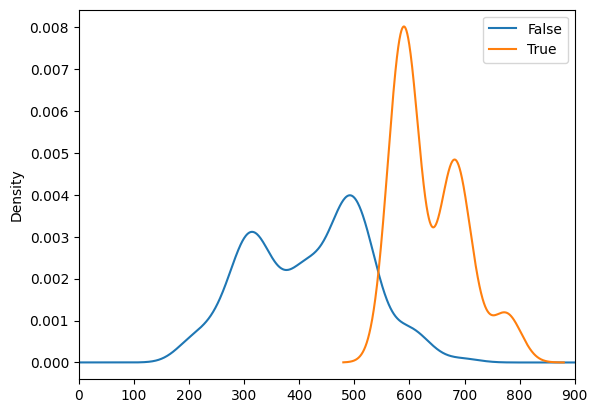

In [144]:
df.groupby('Legendary')['Total'].plot(kind='kde', xlim=[0, 900], legend='True')

# 6. Покажите все случаи (пары покемонов), когда легендарный покемон по показателю Total оказался слабее, чем нелегендарный. Сколько таких случаев?

Сгруппируем и посмотрим разброс легендарных и нелегендарных покемонов по общему показателю:

In [145]:
df.groupby('Legendary')['Total'].describe()

,count,mean,std,min,25%,50%,75%,max
Legendary,,,,,,,,
False,735.0,417.213605,106.760417,180.0,324.0,425.0,498.0,700.0
True,65.0,637.384615,60.937389,580.0,580.0,600.0,680.0,780.0


Нам нужны пары покемонов и случаи, когда нелегендарный покемон слабее легендарного (по показаьелю Total), для этого обратим внимание на разброс значений от минимального до максимального.

Очевидно, что мы сразу можем уменьшить нашу выборку:
- Нам не нужны нелегендарные покемоны с Total < 581 (т.к. наиболее слабый легендарный покемон имеет Total = 580)
- И нет нужды в легендарных покемонах с Total >= 700 (т.к. все покемоны с этого интервала уже сильнее или равны по силе прочим нелегендарным)

In [146]:
""" Legend = df[df['Legendary'] & df['Total'] < 700)] 
Legend = Legend[['#', 'Name', 'Total', 'Legendary']].sort_values('Total')

No_Legend = df[(df['Legendary'] == False) & (df['Total'] > 580)] 
No_Legend = No_Legend[['#', 'Name', 'Total', 'Legendary']].sort_values('Total') """

" Legend = df[df['Legendary'] & df['Total'] < 700)] \nLegend = Legend[['#', 'Name', 'Total', 'Legendary']].sort_values('Total')\n\nNo_Legend = df[(df['Legendary'] == False) & (df['Total'] > 580)] \nNo_Legend = No_Legend[['#', 'Name', 'Total', 'Legendary']].sort_values('Total') "

Впрочем, в данном случае, нет нужды в упрощении выборки. Создадим полную таблицу всех пар легендарных/обычных покемонов и добавим колонку с меткой на нужное нам условие, которая позволит фильтрацией получить необходимые значения. 

In [147]:
Legend = df[df['Legendary']==True].sort_values('Total')
No_Legend = df[df['Legendary']==False].sort_values('Total')

In [148]:
df2 = No_Legend
df1 = Legend
#Добавляем временные ключи для объединения
df1['_temp_key'] = 1
df2['_temp_key'] = 1

#декартово произведение, получаем всевозможные пары покемонов
merged_df = pd.merge(df1, df2, on='_temp_key').drop(columns='_temp_key')

#добавим флаг True в случае проигрыша легендарного покемона в паре
merged_df['Lose_Legendary'] = (merged_df['Total_x'] < merged_df['Total_y'])
merged_df.head()

,#_x,Name_x,Type 1_x,Type 2_x,Total_x,HP_x,Attack_x,Defense_x,Sp. Atk_x,Sp. Def_x,...,Total_y,HP_y,Attack_y,Defense_y,Sp. Atk_y,Sp. Def_y,Speed_y,Generation_y,Legendary_y,Lose_Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,...,180,30,30,30,30,30,30,2,False,False
1,144,Articuno,Ice,Flying,580,90,85,100,95,125,...,190,50,20,40,20,40,20,3,False,False
2,144,Articuno,Ice,Flying,580,90,85,100,95,125,...,194,37,25,41,25,41,25,4,False,False
3,144,Articuno,Ice,Flying,580,90,85,100,95,125,...,195,40,35,30,20,20,50,1,False,False
4,144,Articuno,Ice,Flying,580,90,85,100,95,125,...,195,45,30,35,20,20,45,1,False,False


Получаем таблицу из всевозможных пар покемонов и отметкой о выполнении нужного условия. Остаётся её отфильтровать и получить ответ на вопрос: 

In [149]:
Lose_Legendary = merged_df[merged_df['Lose_Legendary'] == True] 
Lose_Legendary = Lose_Legendary[['#_x', 'Name_x', 'Total_x', 'Legendary_x', '#_y', 'Name_y', 'Total_y', 'Legendary_y']] #Упроситим таблицу, убрав лишние столбцы
print(f'Всего случае когда нелегендарный покемон оказывается сильнее легендарного: {len(Lose_Legendary)}')
Lose_Legendary

Всего случае когда нелегендарный покемон оказывается сильнее легендарного: 1265


,#_x,Name_x,Total_x,Legendary_x,#_y,Name_y,Total_y,Legendary_y
691,144,Articuno,580,True,65,AlakazamMega Alakazam,590,False
692,144,Articuno,580,True,334,AltariaMega Altaria,590,False
693,144,Articuno,580,True,115,KangaskhanMega Kangaskhan,590,False
694,144,Articuno,580,True,80,SlowbroMega Slowbro,590,False
695,144,Articuno,580,True,460,AbomasnowMega Abomasnow,594,False
...,...,...,...,...,...,...,...,...
38954,484,Palkia,680,True,376,MetagrossMega Metagross,700,False
39686,487,GiratinaOrigin Forme,680,True,248,TyranitarMega Tyranitar,700,False
39687,487,GiratinaOrigin Forme,680,True,373,SalamenceMega Salamence,700,False
39688,487,GiratinaOrigin Forme,680,True,445,GarchompMega Garchomp,700,False


**Получаем таблицу из всех 1265 пар покемонов, когда легендарный покемон оказался слабее обычного.**

# 7. Для каждой пары, в которой нелегендарный покемон оказывается сильнее легендарного посчитайте разницу в показателе Total. Постройте гистограму полученной величины. Похоже ли распределение на нормальное? Рассчитайте среднее арифметическое, медиану и моду данной величины.

Для ответа воспользуемся полученной выше таблицей. Добавим к ней столбец с разницей показателей 'Total':

In [150]:
Lose_Legendary['Difference Total'] = (Lose_Legendary['Total_y'] - Lose_Legendary['Total_x'])
Lose_Legendary

,#_x,Name_x,Total_x,Legendary_x,#_y,Name_y,Total_y,Legendary_y,Difference Total
691,144,Articuno,580,True,65,AlakazamMega Alakazam,590,False,10
692,144,Articuno,580,True,334,AltariaMega Altaria,590,False,10
693,144,Articuno,580,True,115,KangaskhanMega Kangaskhan,590,False,10
694,144,Articuno,580,True,80,SlowbroMega Slowbro,590,False,10
695,144,Articuno,580,True,460,AbomasnowMega Abomasnow,594,False,14
...,...,...,...,...,...,...,...,...,...
38954,484,Palkia,680,True,376,MetagrossMega Metagross,700,False,20
39686,487,GiratinaOrigin Forme,680,True,248,TyranitarMega Tyranitar,700,False,20
39687,487,GiratinaOrigin Forme,680,True,373,SalamenceMega Salamence,700,False,20
39688,487,GiratinaOrigin Forme,680,True,445,GarchompMega Garchomp,700,False,20


Получили **таблицу с разницей общих показателей. Построим гистограмму:**

<Axes: xlabel='Difference Total', ylabel='Count'>

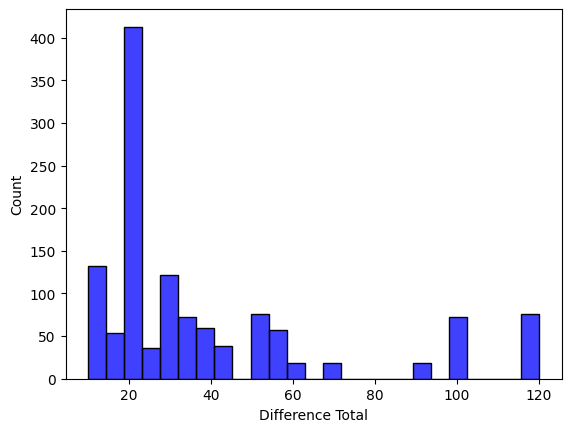

In [151]:
sns.histplot(Lose_Legendary['Difference Total'], bins=25, color='blue')

**Распределение не похоже на нормальное.** Оценим это более формульно, используя Quantile-Quantile Plots и тест Шапиро-Уилка:

In [152]:
import scipy.stats as stats
from scipy.stats import shapiro

Text(0.5, 1.0, 'Q-Q Plot normal')

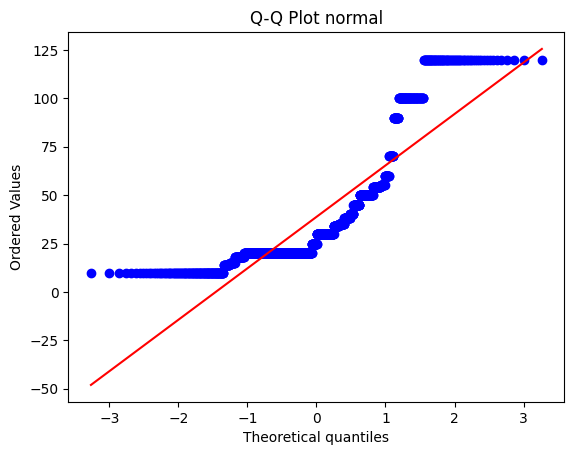

In [153]:
# Создаем Q-Q plot для данных
stats.probplot(Lose_Legendary['Difference Total'], dist="norm", plot=plt)
plt.title('Q-Q Plot normal')

Сильное отклонение точек от прямой линии, указывает на **ненормальность распределения**.

Статистика = 0.763, p-значение = 0.000
Данные не распределены нормально (отвергаем H0)


Text(0.5, 1.0, 'Гистограмма и KDE')

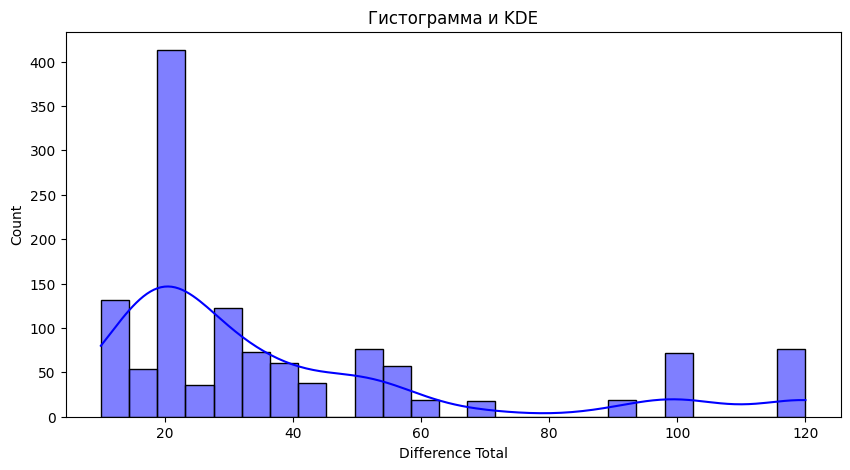

In [154]:
data = Lose_Legendary['Difference Total']

# Выполняем тест Шапиро-Уилка
stat, p = shapiro(data)

# Результаты теста
print('Статистика = %.3f, p-значение = %.3f' % (stat, p))
if p > 0.05:
    print('Данные распределены нормально (не отвергаем H0)')
else:
    print('Данные не распределены нормально (отвергаем H0)')

# Визуализация данных
plt.figure(figsize=(10, 5))

# Гистограмма и KDE (плотность распределения)
sns.histplot(data, kde=True, bins=25, color='blue')
plt.title('Гистограмма и KDE') 

**Среднее арифметическое, медиана и мода для заданной величины:**

In [155]:
results = Lose_Legendary['Difference Total'].agg(['mean', 'median'])
mode_value = Lose_Legendary['Difference Total'].mode()[0]
results['mode'] = mode_value

results

mean      38.746245
median    25.000000
mode      20.000000
Name: Difference Total, dtype: float64

# 8. Назовите две характеристики покемонов, которые коррелируют в наименьшей степени.

Построим таблицу корреляции между всеми числовыми величинами:

In [156]:
Correl = df[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']].corr()
Correl

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


Считаем из таблицы несимметрычные и недиагональные элементы в одномерный массив:

In [157]:
Correl.values[np.tril_indices_from(Correl)] = np.nan
stacked_correl = Correl.stack()

Остаётся вывести два наименьших элемента(смотрим абсолютную величину (модуль), так как в задание не указано иных ограничений):

In [158]:
two_min_abs_values = stacked_correl.abs().nsmallest(2)
two_min_abs_values

Defense  Speed         0.015227
Speed    Generation    0.023121
dtype: float64

**Defense/Speed** и **Speed/Generation** коррелируют в наименьшей степени в сравнении с остальными числовыми характеристиками покемонов* 

# 9. Что делает покемона легендарным, кроме суммы характеристик? Важнее сила атаки или сила защиты, а может сила специальной атаки или сила специальной защиты, или скорость, или здоровье? А может важна уникальность типа или поколение покемона? Подкрепите свое мнение расчетами.

In [159]:
tmp_df.head() # Обращусь к таблице с доп. отметкой о двойных покемонах, можно посмотреть взаимосвязь и легендарных и двойных покимонов

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Dual
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,False


Построим всё туже таблицу зависимостей параметров, но для наглядности используем тепловую карту:

Text(0.5, 1.0, 'Тепловая карта корреляций параметров')

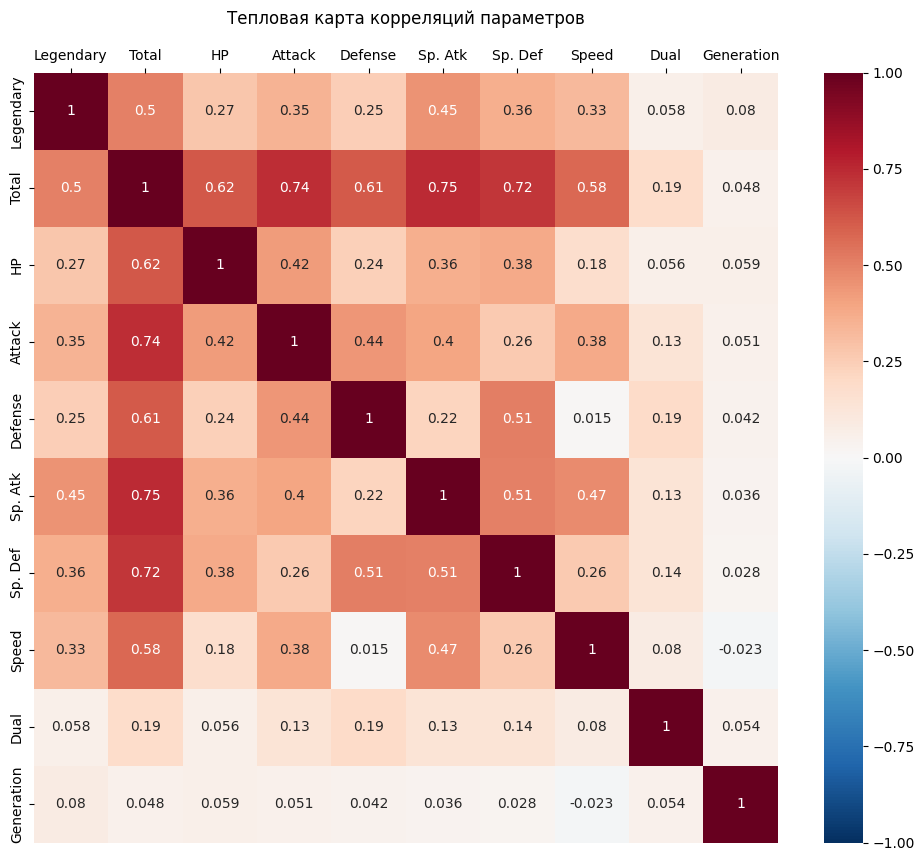

In [160]:
check_corr = tmp_df[['Legendary', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Dual', 'Generation']]
correlation = check_corr.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r").xaxis.set_ticks_position('top') 
plt.title('Тепловая карта корреляций параметров', pad=35)


Выделим, какие параметры наиболее сильно коррелируют с легендарностью покемона:

In [161]:
legendary_corr = correlation.loc['Legendary'].drop('Legendary')
sorted_corr = legendary_corr.sort_values(ascending=False)
sorted_corr

Total         0.501758
Sp. Atk       0.448907
Sp. Def       0.363937
Attack        0.345408
Speed         0.326715
HP            0.273620
Defense       0.246377
Generation    0.079794
Dual          0.058254
Name: Legendary, dtype: float64

Однако, корреляция не равна причинности, она показывает взаимосвязь, но не гарантирует, что именна такая степень влияния делает покемона легендарным.

Для исследования причинности воспользуемся методом логистической регрессии.

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [163]:
# Подготовка данных
X = check_corr[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Dual', 'Generation']]
y = check_corr['Legendary']

# Разделение на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализация и обучение 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

importances = model.coef_[0]

#Создадим DataFrame для сортировки и демонстрации
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': importances
})
importance_df_sorted = importance_df.sort_values(by='Coefficient', ascending=False)

print(importance_df_sorted, '\n')
test_score = model.score(X_test_scaled, y_test)
print(f'Test Accuracy: {test_score}')

      Feature  Coefficient
6       Speed     1.208472
0       Total     1.183706
5     Sp. Def     0.946550
4     Sp. Atk     0.938011
3     Defense     0.816424
8  Generation     0.732721
1          HP     0.629154
2      Attack     0.271648
7        Dual    -0.364190 

Test Accuracy: 0.95625


Коэффициенты логистической регрессии дают нам количественное представление о том, как каждая переменная влияет на вероятность того, что покемон является легендарным. Эти коэффициенты позволят нам понять значимость каждого параметра и его влияние на классификацию покемона.

Text(0, 0.5, 'Feature')

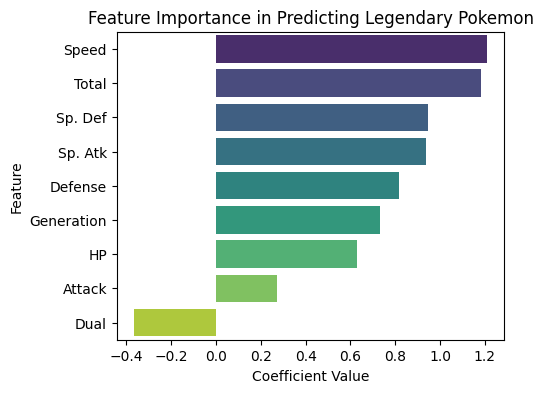

In [164]:
plt.figure(figsize=(5, 4))
sns.barplot(x='Coefficient', y='Feature', data=importance_df_sorted, palette='viridis', hue='Feature', dodge=False)
plt.title('Feature Importance in Predicting Legendary Pokemon')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')

**Наглядно получили степень влияния параметров на причинность легендарных покемонов.** 